# Two-State Economy
----

## Fundamental theorem of asset pricing

Say, we invest 9.5 at t = 0, and get 11.75 later at t = 1. Then the modelling that follows is as below

In [1]:
c0 = -9.5
c1 = 11.75

c = (c0, c1)  
# making a tuple but can be done with list as well, mutability is not a problem there
c, type(c)

((-9.5, 11.75), tuple)

In [94]:
c

## Returns 

Return is the sum of all the cash flows. The rate of dividing the return by the absolute value of investment 

$$  r = \frac{R}{|c_0|}$$
where $c_0$ is the amount that way cashed out , hence negative sign

In [95]:
c = (-10, 12)
c

In [96]:
# same can be attained with the list and maybe more easier to interpret
c = [c0, c1]
c

In [97]:
R = sum(c)
R

In [98]:
# r is the return rate , also c[0] was the investment which was poured first. The investment project was (c0, c1)
r = R / (abs(c[0]))
r

## Interest 

The difference between the cash flow today and cash flow one year later are not same. This quantitatively explains interest
$$ i = \frac{I}{|c_0|} $$
where $I$ is the amount that is paid on the deposit

## Present Value 
$$ c_0 = D(c_1) $$

$$ c_0 = \frac{c_1}{1 + i} $$
and $i$ is the interest rate that remains same for everyone in the economy , $c_0$ is the amount that was relayed at time earlier and $c_1$ is the amount that is to be relayed now. Clearly both the amount, though mathematically same, are finanially not same. There must be a interest addition on the amount if we want to say the former is same as latter

## Discouting

In [99]:
i =0.1

In [100]:
def D(c1):
    '''returns present value of c1 and c1 is the present value of amount which was earlier c0
    D is for the discounting. Present value is valued that way'''
    return c1/(1 + i)

In [101]:
D(c1 = 12.1)

# It means that 12.1 in one year cannot be compared directly in terms of values wih a 
# cash flow of 1.21 today since interest can be earned there

In [102]:
D(c1 = 11)
# So present value of cash outflow of 11 in one year is 10 in present time, with interest rate of 0.1 ofc 

## Net present Value 

To decide whether to invest in the project is worth it or not 

$$ NPV(c) = c_0 + D(c_1) $$

We map a cash flow tuple to a real number ,$ R^2 \rightarrow R$ .
When the net value is positive, you go for investment else , you stay back and deposit the sum in bank 

In [103]:
def NPV(c):
    '''positive value of NPV is the metric to proceed with the investment'''
    return c[0] +  (D(c[1]))

In [104]:
cA = (-10.5, 12.1)
cB = (-10.5, 11)

In [105]:
# net present value
NPV(cA)

In [106]:
NPV(cB)

## Uncertainty

Well ,you know already. yeet !!
The economy can go up or down and same can be given by a column vector of data

In [107]:
import numpy as np

c0 = -10  #cash outflow today
c1 = np.array((20,5)) # uncertain cash inflow vector in one year

c = (c0, c1) #combining the cash flow to tuple object
c

(-10, array([20,  5]))

## Financial Assets 

Price today is independent of the state of market $$ S_0 ^d = S_0 ^u = S_0$$ , up or down but price one year later is generally not i.e $$ (S_t)_{t \in {0,1}} = (S_0, S_1)$$ and rememeber that both the states are equally likely 

In [108]:
S0 = 10
S1 = np.array((12.5, 7.5))
# so in one case the market can go up or it can go down with respective valuations
S = (S0, S1)
S

(10, array([12.5,  7.5]))

When one has a fully specified probability measure available for economy , the economy under risk and otherwise it is economy under ambiguity

In [109]:
# we are defining the probability for each state of market
p = 0.4
p

In [110]:
1-p

## Expectation 

In [111]:
P = np.array((p, 1-p))
# previously defined probability measure

S0 = 10
# price of asset today

S1 = np.array((20,5))
# vector of uncertain price in one year, if the state is up we get 20 and vice versa

np.dot(P, S1)
# expectation value of prices

In [112]:
# in crude terms this is what we are doing ,a simple calculation of expectations

p * S1[0] + (1-p) * S1[1]

## Expected rate of return 

$$ E^P (r) = \frac{E^P (R)}{S_0} $$ and for brevity, we use $E^P (r) = \mu$

In [113]:
def ER(x0, x1):
    '''returns expected return'''
    return np.dot(P, x1) - x0

In [114]:
S0

In [115]:
# S1 is the uncertainty vector which defines tomorrows market in either up or down state
S1

array([20,  5])

In [116]:
# expected return and calculation
ER(S0, S1)

In [117]:
def mu(x0, x1):
    '''returns expected rate of return, often given by the symbol mu'''
    return (np.dot(P, x1) - x0) / x0

In [118]:
mu(S0,S1)

----
## Volatility

Standard deviations of the rates of return , or square root of the variances 

In [119]:
def r(x0, x1):
    '''returns rates vector'''
    return (x1 - x0) /x0

In [120]:
r(S0,S1)
# vector representing return rates for the both outcome of the market

array([ 1. , -0.5])

In [121]:
mu = np.dot(P, r(S0, S1))
# expected return via expectations 
mu

In [122]:
def sigma2(P,r, mu):
    '''definition of variances'''
    return np.dot(P, (r-mu)**2)

In [123]:
sigma2(P, r(S0, S1), mu)

In [124]:
def sigma(P,r, mu):
    '''definition of volatility'''
    return np.sqrt(np.dot(P, (r-mu)**2))

In [125]:
sigma(P, r(S0, S1), mu)

## Contingent claims
> These are again materialised by the call option given by C = max(S - K, 0) where K is the strike price

In [126]:
S1 = np.arange(20)
S1[:7]

array([0, 1, 2, 3, 4, 5, 6])

In [127]:
K  = 10
# fixing the strike price for the option and look how vectorisation makes it all easy

C1 = np.maximum(S1 - K, 0)
C1
# calculating vector of our payoffs for the given call price

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [128]:
from pylab import mpl, plt

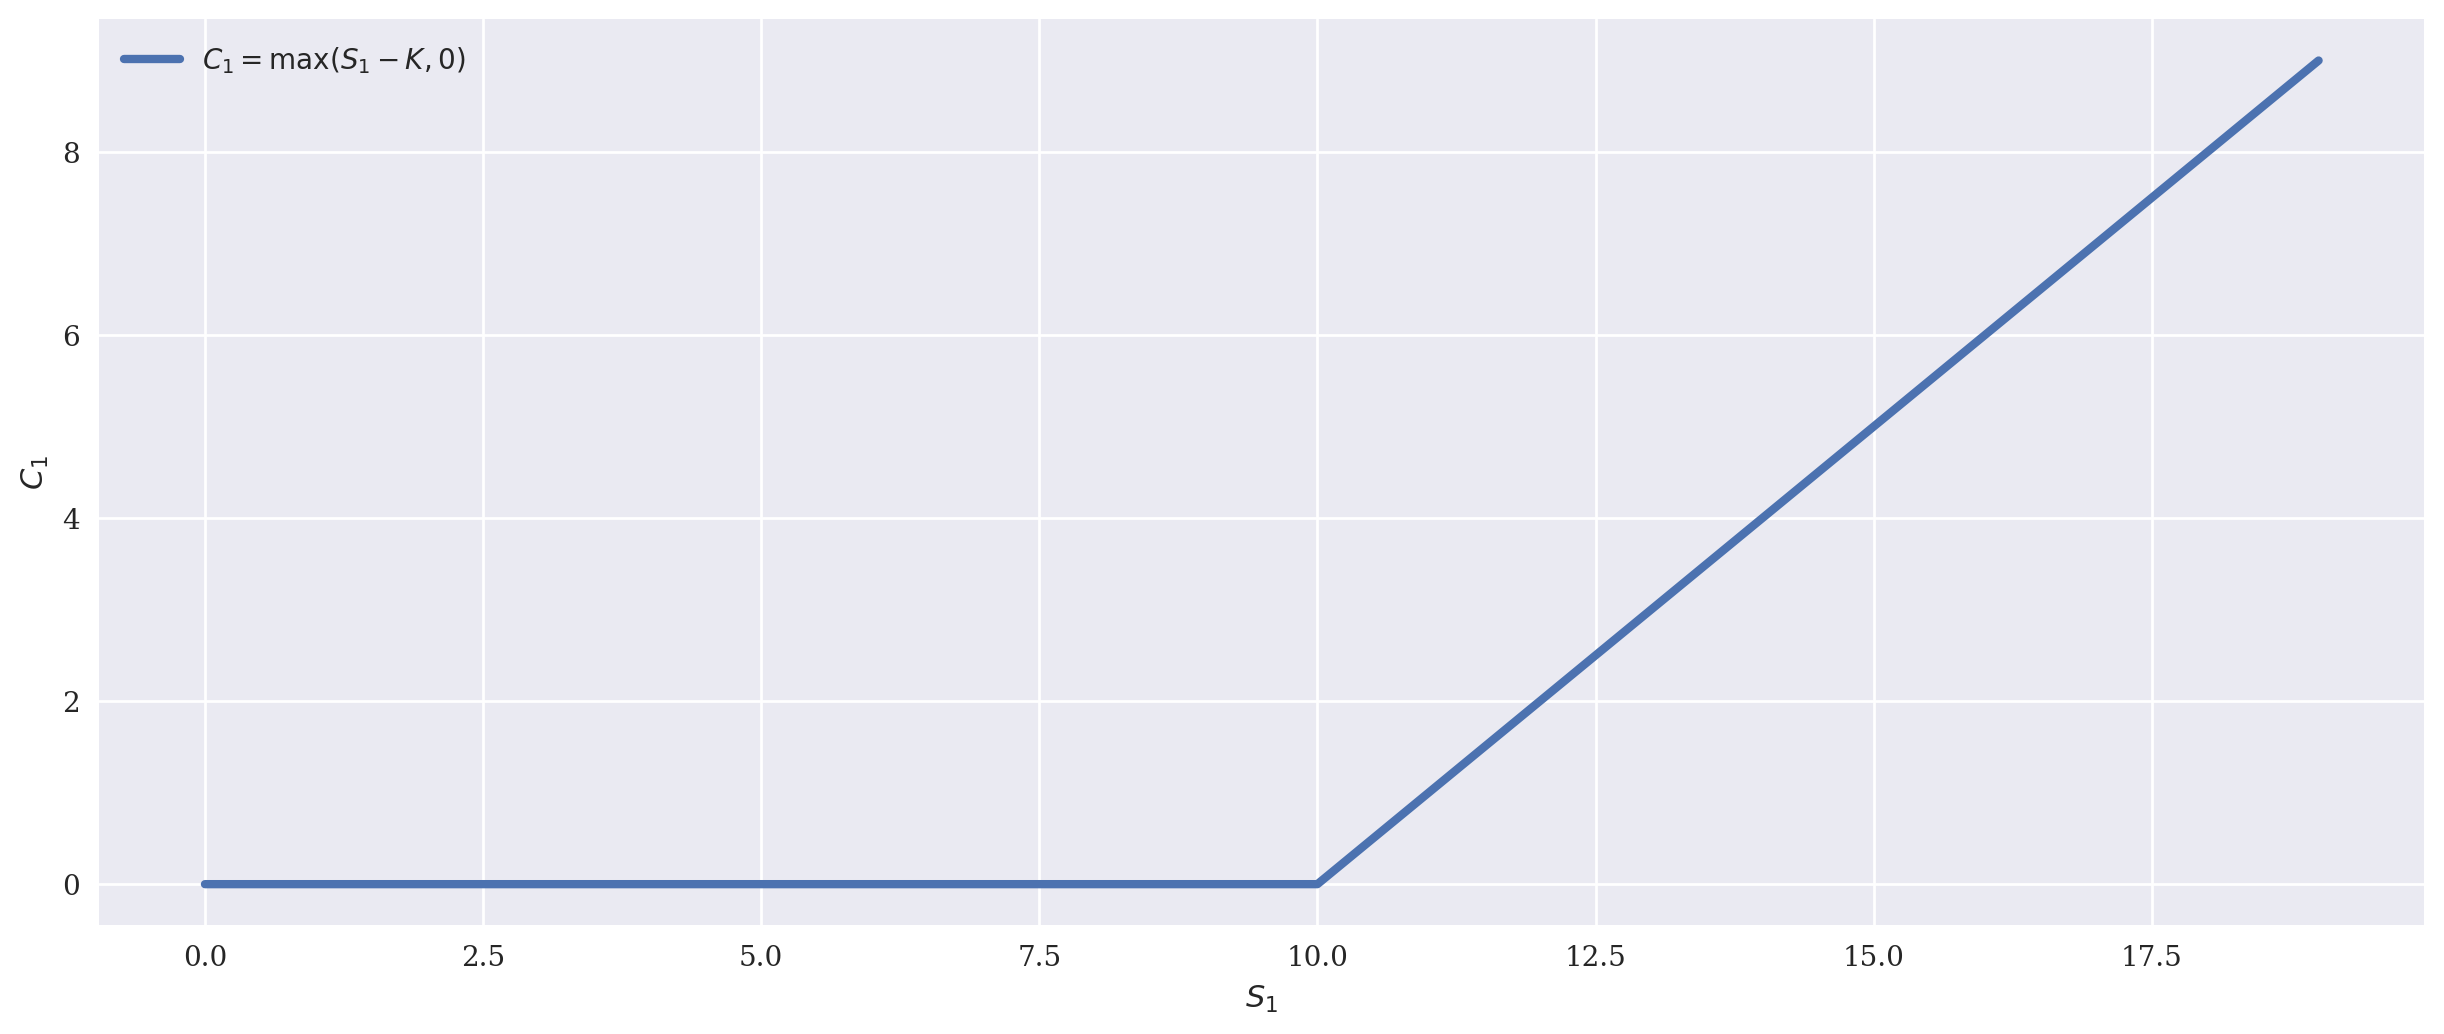

In [131]:
# plotting configuration

plt.style.use('seaborn')
mpl.rcParams['figure.dpi'] = 200
mpl.rcParams['font.family'] = 'serif'

plt.figure(figsize=(15,6))
plt.plot(S1, C1, lw = 3, label= '$C_1 = \max(S_1 - K,0)$')
plt.legend(loc = 0)
plt.xlabel('$S_1$')
plt.ylabel('$C_1$')
plt.show()


## Replication 

Checking the redundancy of the contingent claims. Mathematically, whether the contingent claims are linearly dependento or independent

!['image'](img/1.png)

In [132]:
b = -5/33
s = 1/3

s,b

In [133]:
B = (10, np.array((11,11)))
# defining price process for B i.e. risk less bond

S = (10, np.array((20,5)))
# defining price process for S i.e. risky stock

M = np.array((B[1], S[1])).T
M
# defining a 2D matrix with future payoff vectors

array([[11, 20],
       [11,  5]])

In [134]:
K = 15 
# strike price

C1 = np.maximum(S[1] - K, 0)
C1

array([5, 0])

$ \text{now solving the equation } \mu \cdot \phi = C_1  \text{ where } \phi \text{ is the portfolio of the trading strategy and contains bond and stocks }$

$$  \mu = \Biggl(\begin{pmatrix}
B_1 & S_1 ^u \\
B_1 & S_1 ^ d
\end{pmatrix}
\Biggl)$$
$\text{The first row contains the payoff of both financial asset in the state UP, while the second row contains the payoff from the DOWN state }$

In [139]:
phi = np.linalg.solve(M,C1)
phi

# replication solution in matrix form of optimal portfolio
# notice that this means we can sell 0.15% and but 0.33% and they would be equivalent here, hence the protofolio is optimal here

array([-0.15151515,  0.33333333])

$\text{The interpretation is that if we reduce the first stock to 0.15 and increase the second one to 0.33 , we will have the optimal portfolio}$ 

##  Arbitrage Pricing

  Arbitrage is an investment strategy in which an investor simultaneously buys and sells an asset in different markets to take advantage of a price difference and generate a profit. It is a risk less profit strategy

$$ V_0 (\phi) = 0 \text{ and } E^P ( V_1(\phi)) > 0 $$ 
   meaning you invest amount 0, and get non-zero positive return

  Formally, the arbitrage price is the dot product of the replication portfolio and and the price vector of the replicating financical assets

In [138]:
C0 = np.dot(phi, (B[0], S[0]))
C0

In [42]:
# and let's check

B[0], S[0]

(10, 10)

In [43]:
10/3 - 50/33

1.8181818181818183

below cells are just confusions  I had - dated 25/9/22

In [44]:
-0.15151515+ 0.33333333 + 1

# is this coincidental ?? 

1.18181818

In [45]:
phi

array([-0.15151515,  0.33333333])

In [46]:
abs(phi[0] + phi[1]) + 1 

1.1818181818181819

In [47]:
50/33

1.5151515151515151

In [48]:
10/3

3.3333333333333335

## Market Completeness 

I don't understand as of now but I am trying 

We are going to simluate 1000 random portfolio composition 

In [49]:
from numpy.random import default_rng

In [50]:
?default_rng

In [51]:
rng = default_rng(seed = 100)
# fixes the seed for random generator 

In [52]:
n = 1000
b = rng.random(n)
# b simulates bond position between 0 and 1 
b [:10]

array([0.83498163, 0.59655403, 0.28886324, 0.04295157, 0.9736544 ,
       0.5964717 , 0.79026316, 0.91033938, 0.68815445, 0.18999147])

In [53]:
s = 1 - b
s[:10]
# dervies the stock position as difference between 1 and the bond position

array([0.16501837, 0.40344597, 0.71113676, 0.95704843, 0.0263456 ,
       0.4035283 , 0.20973684, 0.08966062, 0.31184555, 0.81000853])

In [54]:
B[1]
# risk less bond 

array([11, 11])

In [55]:
S[1]
# risky bond 

array([20,  5])

In [56]:
def portfolio(b,s):
    A = [b[i]*B[1] + s[i]*S[1] for i in range(n)]
    return np.array(A)

Calculation done above is 
$$ \begin{pmatrix}
B_1 & S_1 ^u \\
B_1 & S_1 ^ d
\end{pmatrix} \cdot \begin{pmatrix}
b \\
s
\end{pmatrix}  = \begin{pmatrix}
0\\
0
\end{pmatrix}$$
 and we have to ensure there is only unique solution here as (0,0) and no other solution, by the claim that if such case follows , we have market completeness

In [57]:
A = portfolio(b,s)
A[:3]

array([[12.48516533, 10.00988978],
       [14.63101376,  8.57932416],
       [17.40023082,  6.73317945]])

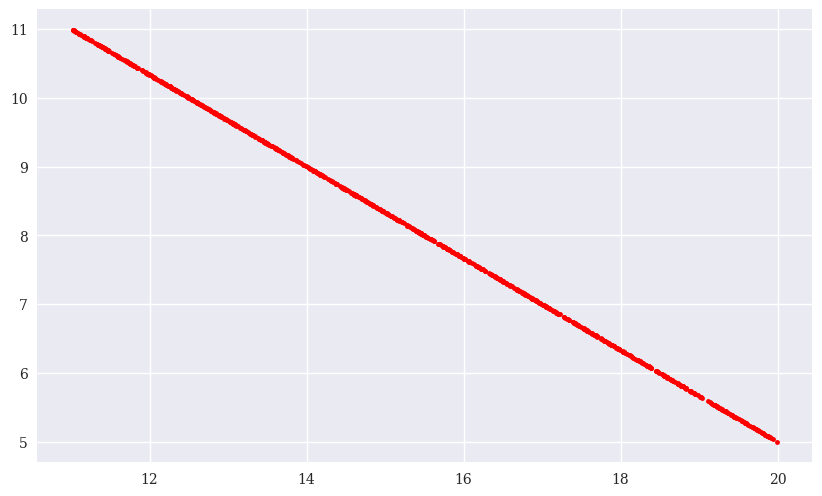

In [58]:
plt.figure(figsize=(10,6))
plt.plot(A[:,0], A[:,1], 'r.');

### Now ,when  portfolio positions do not need to add upto 1 

In [59]:
s = rng.random(n)

In [60]:
b[:5] + s[:5]

array([1.36885777, 1.5863474 , 0.71245805, 0.32077672, 1.5401562 ])

In [61]:
A = portfolio(b,s)

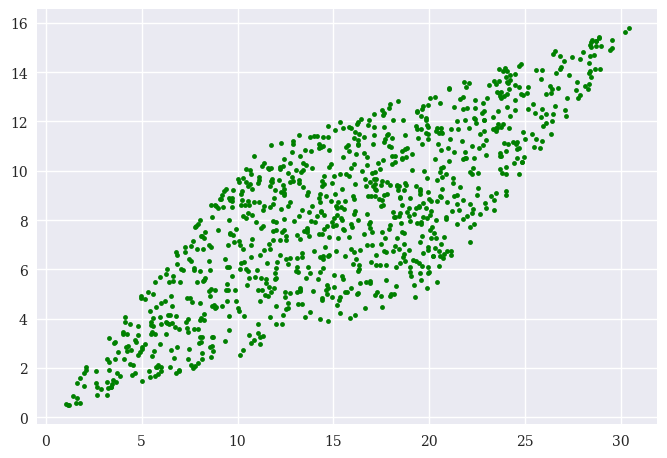

In [62]:
plt.plot(A[:,0], A[:,1], 'g.');

### Now, when netaive portfolio position is allowed as well 

        Negative and positive portfolio position assimilated by means of standard normal distribution.

In [63]:
b = rng.standard_normal(n)
b[:4]

array([-0.03825063, -2.23516339,  0.57495889, -0.41302936])

In [64]:
s = rng.standard_normal(n)

In [65]:
b[:5] + s[:5]

array([-0.23046605, -3.45760465,  1.10260637, -2.44445777,  1.05866637])

In [66]:
A = portfolio(b,s)

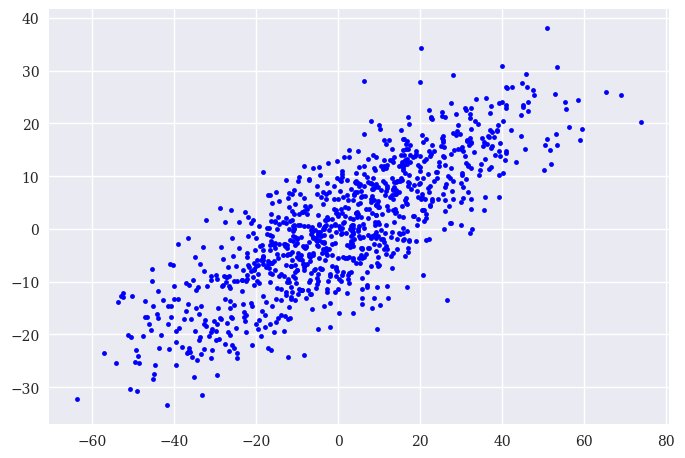

In [67]:
plt.plot(A[:,0], A[:,1], 'b.');

## Arrow -Debreu Securities 

An Arrow-Debreu security is defined by the fact that it pays exactly one unit of currency in a specified future state. In a model economy with two different future states only, there can only be two different such securities. An Arrow-Debreu security is simply a special case of a contingent claim such that the replication argument from before applies. *In other words, since the market is complete, Arrow-Debreu securities can be replicated by portfolios in the bond and stock. Therefore, both replication problems have (unique) solutions, and both securities have unique arbitrage prices.*

$$ \mu \cdot \phi = \begin{pmatrix}
1\\
0
\end{pmatrix} \text{ and } 
\mu \cdot \phi = \begin{pmatrix}
0\\
1
\end{pmatrix}$$ 


## Martingale Pricing 

Don't know as of now 

# First Fundamental Theorem of Asset Pricing

    Following statements are equivalent 
       1. The martingale measure exists 
       2. The economy is arbitrage free

The martingale price for the call option is 
$$ C_0 = \frac{1}{1 + i} \cdot E^{Q} (C_1)$$
where q is related to Martingale pricing 

# Mean Variance Portfolio

Read about on internet. This is interesting 

In [68]:
import sympy
sympy.init_printing()

In [69]:
B = (10, np.array((11,11)))
S = (10, np.array((20, 5)))
M = np.array((B[1], S[1])).T

In [70]:
M
# matrix with the future prices of financial assets

array([[11, 20],
       [11,  5]])

In [71]:
M0 = np.array((B[0], S[0]))
M0
# vectro of prices of assets today

array([10, 10])

In [72]:
R = M / M0 - 1
R
# return matrix

array([[ 0.1,  1. ],
       [ 0.1, -0.5]])

In [73]:
P = np.array((0.5, 0.5))
P
# probability measure 

array([0.5, 0.5])

expected portfolio return and volatility are calculated as dot product

In [74]:
np.dot(P,R)
# expected return of bond and the stock

array([0.1 , 0.25])

In [75]:
s = 0.55
# example allocation of the stock 

In [76]:
phi = (1-s, s)
phi
# resulting potfolio with normalized weight in 1

In [77]:
mu = np.dot(phi, np.dot(P,R))
mu
# expected return given the allocations 

In [78]:
sigma = s*R[:, 1].std()
sigma
# volatility of the porrtfolio 

### Plotting

In [79]:
values = np.linspace(0,1,25)
mu = [np.dot(((1-s),s), np.dot(P,R)) for s in values]
mu

In [80]:
sigma = [s*R[:,1].std() for s in values]
sigma

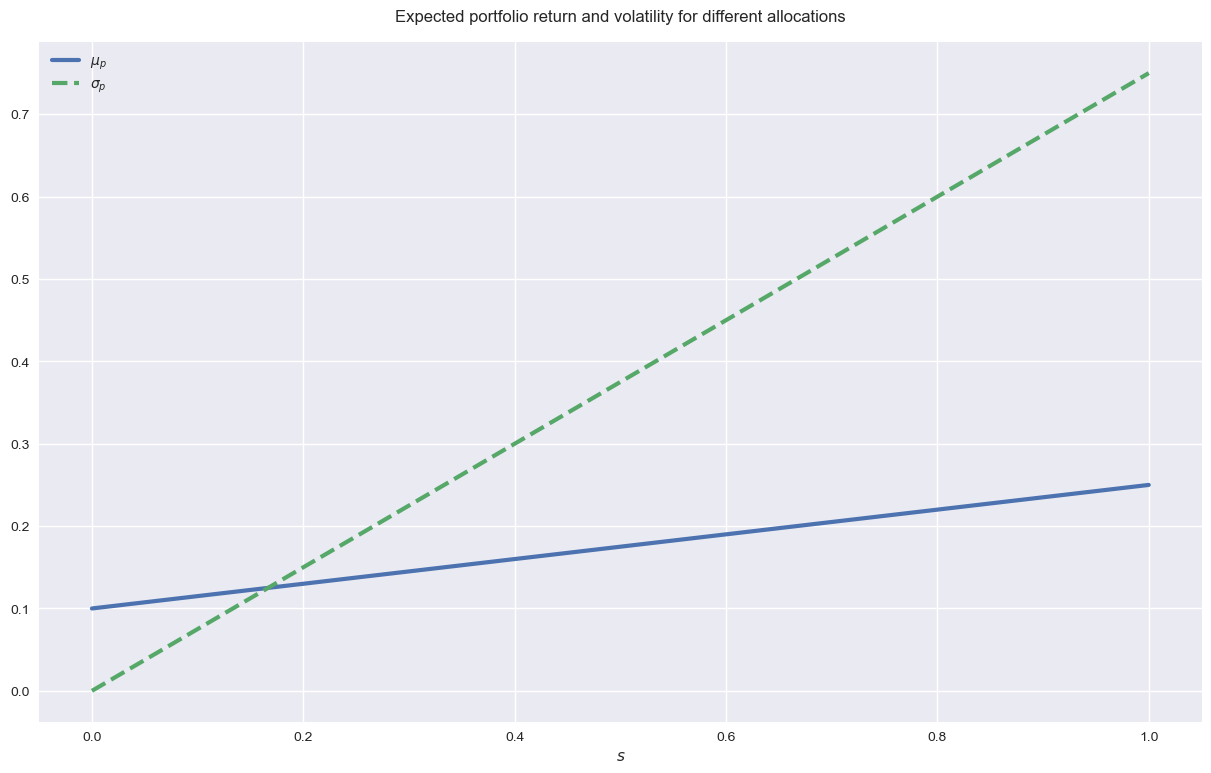

In [81]:
from pylab import plt
import matplotlib
plt.style.use('seaborn')

matplotlib.rcParams['figure.figsize']= (15,9)

plt.plot(values, mu, lw = 3.0, label = '$\mu_p$')
plt.plot(values, sigma, '--', lw = 3.0, label = '$\sigma_p$')
plt.legend(loc=0)
plt.title('Expected portfolio return and volatility for different allocations', pad=15)
plt.xlabel('$s$');

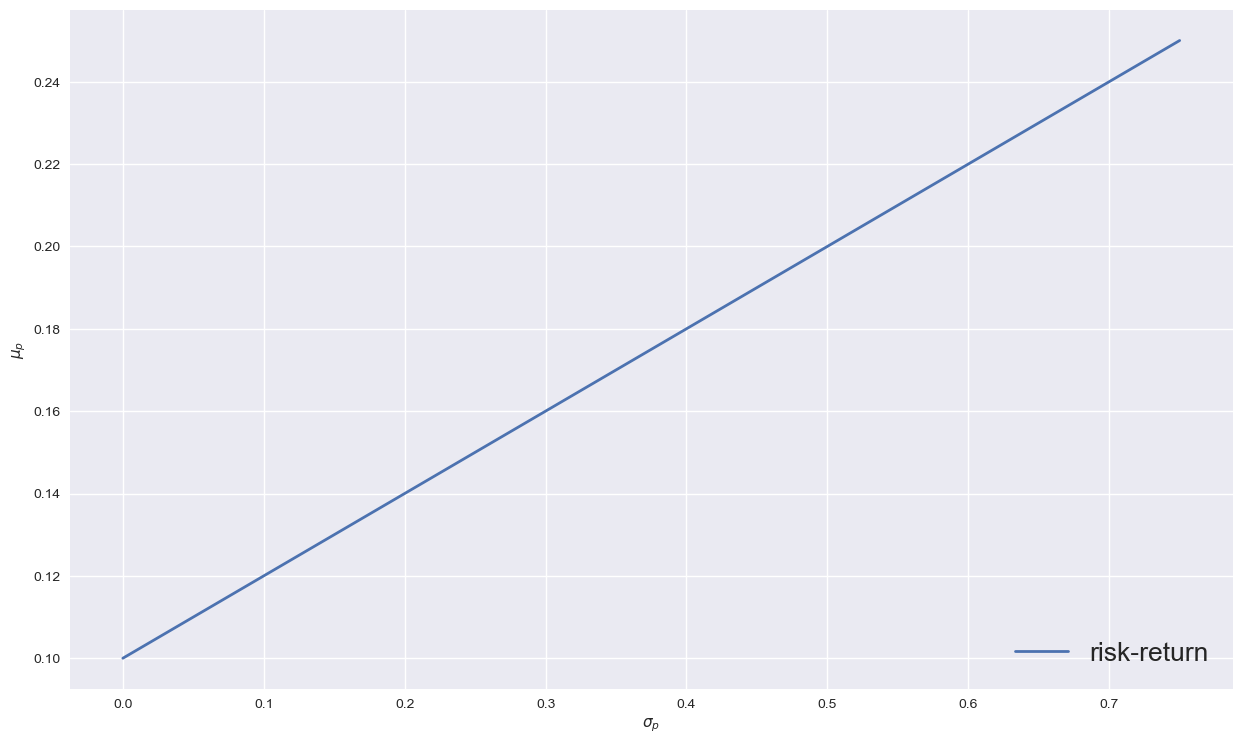

In [82]:
plt.plot(sigma, mu, lw = 2, label = 'risk-return')
plt.legend(loc = 4, fontsize = 19)
plt.xlabel('$\sigma_p$')
plt.ylabel('$\mu_p$');

In [83]:
import scipy.stats as st
import seaborn as sns

In [84]:
result = st.linregress(sigma, mu)

In [85]:
result.slope

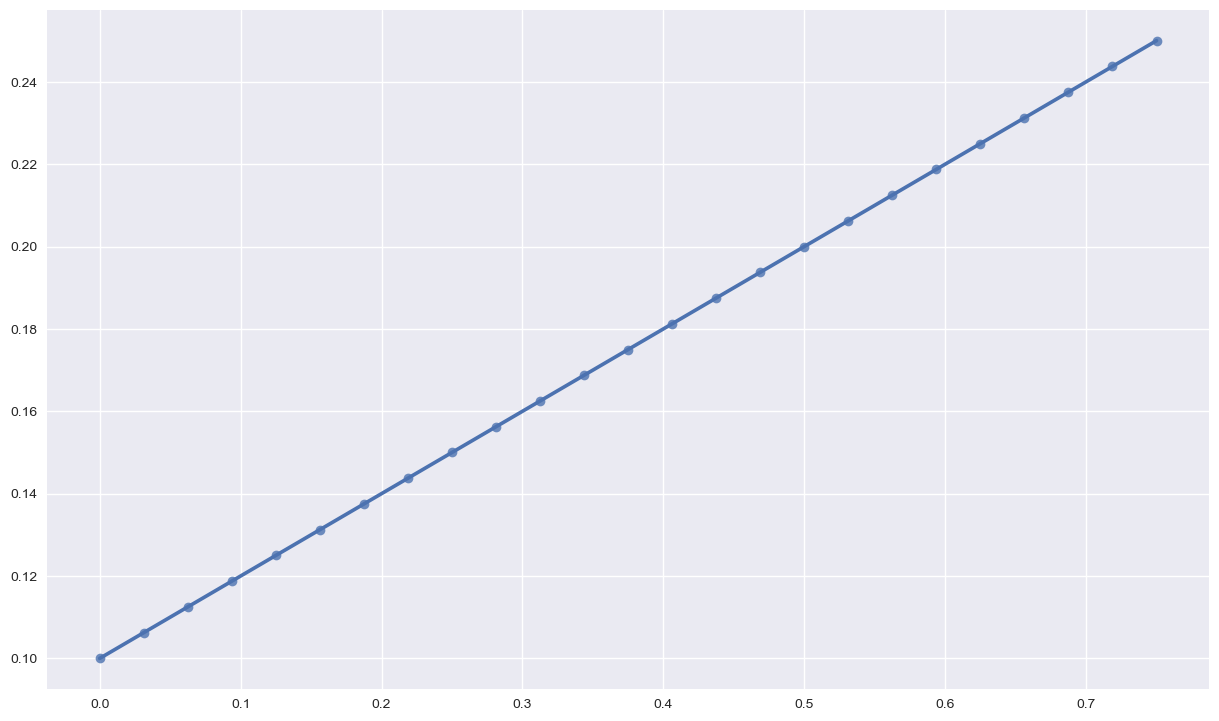

In [86]:
sns.regplot(x=sigma, y = mu);